<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_1_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.029338,74.949478,47.143298,0.005664,216.127779,216.131526,-0.003748
1,0.0,1.0,95.863652,71.246326,69.497575,0.030302,246.637855,246.617998,0.019857
2,0.0,2.0,75.335168,86.155727,91.055340,0.026723,262.572958,262.544549,0.028409
3,0.0,3.0,97.935788,88.626073,39.891989,-0.000511,236.453338,236.459209,-0.005870
4,0.0,4.0,37.297650,59.714356,53.601055,0.051422,160.664482,160.623067,0.041416
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,99.000953,74.545787,34.958172,-0.017618,218.487294,218.496301,-0.009007
29996,999.0,26.0,83.943710,52.324950,69.290183,-0.039866,215.518977,215.549746,-0.030770
29997,999.0,27.0,33.335976,47.700495,57.723261,-0.017614,148.742118,148.779066,-0.036948
29998,999.0,28.0,72.607876,50.118847,72.985517,-0.045581,205.666659,205.706294,-0.039635


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.029338  74.949478  47.143298  ...  216.127779  216.131526 -0.003748
      1.0    95.863652  71.246326  69.497575  ...  246.637855  246.617998  0.019857
      2.0    75.335168  86.155727  91.055340  ...  262.572958  262.544549  0.028409
      3.0    97.935788  88.626073  39.891989  ...  236.453338  236.459209 -0.005870
      4.0    37.297650  59.714356  53.601055  ...  160.664482  160.623067  0.041416
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   99.000953  74.545787  34.958172  ...  218.487294  218.496301 -0.009007
      26.0   83.943710  52.324950  69.290183  ...  215.518977  215.549746 -0.030770
      27.0   33.335976  47.700495  57.723261  ...  148.742118  148.779066 -0.036948
      28.0   72.607876  50.118847  72.985517  ...  205.666659  205.706294 -0.039635
      29.0   31.699863  50.565626  50.770725  ...  143.111173  143.058487  0.052686

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.029338  74.949478  47.143298  ...  216.127779  216.131526 -0.003748
      1.0    95.863652  71.246326  69.497575  ...  246.637855  246.617998  0.019857
      2.0    75.335168  86.155727  91.055340  ...  262.572958  262.544549  0.028409
      3.0    97.935788  88.626073  39.891989  ...  236.453338  236.459209 -0.005870
      4.0    37.297650  59.714356  53.601055  ...  160.664482  160.623067  0.041416
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   99.000953  74.545787  34.958172  ...  218.487294  218.496301 -0.009007
      26.0   83.943710  52.324950  69.290183  ...  215.518977  215.549746 -0.030770
      27.0   33.335976  47.700495  57.723261  ...  148.742118  148.779066 -0.036948
      28.0   72.607876  50.118847  72.985517  ...  205.666659  205.706294 -0.039635
      29.0   31.699863  50.565626  50.770725  ...  143.111173  143.058487  0.052686

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.029338,74.949478,47.143298,0.005664,216.127779,216.131526,-0.003748
1,0.0,1.0,95.863652,71.246326,69.497575,0.030302,246.637855,246.617998,0.019857
2,0.0,2.0,75.335168,86.155727,91.055340,0.026723,262.572958,262.544549,0.028409
3,0.0,3.0,97.935788,88.626073,39.891989,-0.000511,236.453338,236.459209,-0.005870
4,0.0,4.0,37.297650,59.714356,53.601055,0.051422,160.664482,160.623067,0.041416
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,99.000953,74.545787,34.958172,-0.017618,218.487294,218.496301,-0.009007
29996,999.0,26.0,83.943710,52.324950,69.290183,-0.039866,215.518977,215.549746,-0.030770
29997,999.0,27.0,33.335976,47.700495,57.723261,-0.017614,148.742118,148.779066,-0.036948
29998,999.0,28.0,72.607876,50.118847,72.985517,-0.045581,205.666659,205.706294,-0.039635


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.029338  74.949478  47.143298  ...  216.127779  216.131526 -0.003748
      1.0    95.863652  71.246326  69.497575  ...  246.637855  246.617998  0.019857
      2.0    75.335168  86.155727  91.055340  ...  262.572958  262.544549  0.028409
      3.0    97.935788  88.626073  39.891989  ...  236.453338  236.459209 -0.005870
      4.0    37.297650  59.714356  53.601055  ...  160.664482  160.623067  0.041416
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   99.000953  74.545787  34.958172  ...  218.487294  218.496301 -0.009007
      26.0   83.943710  52.324950  69.290183  ...  215.518977  215.549746 -0.030770
      27.0   33.335976  47.700495  57.723261  ...  148.742118  148.779066 -0.036948
      28.0   72.607876  50.118847  72.985517  ...  205.666659  205.706294 -0.039635
      29.0   31.699863  50.565626  50.770725  ...  143.111173  143.058487  0.052686

[30000 rows x 7 columns]

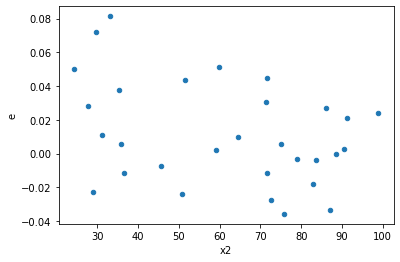

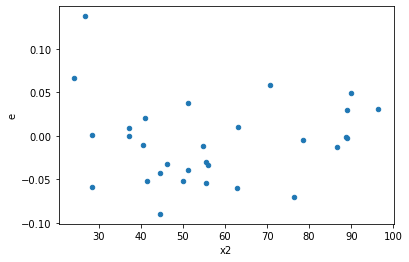

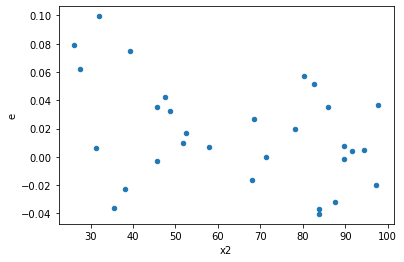

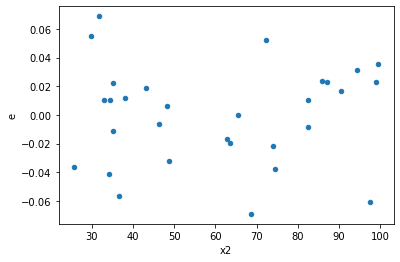

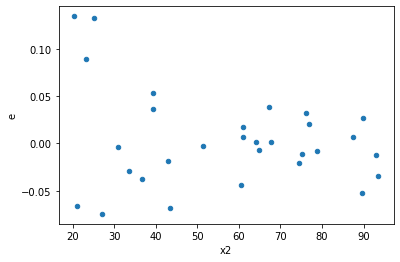

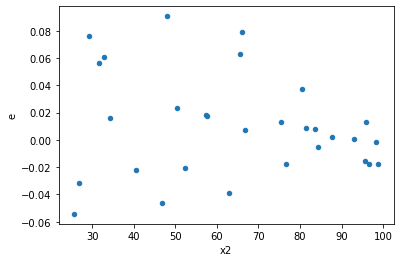

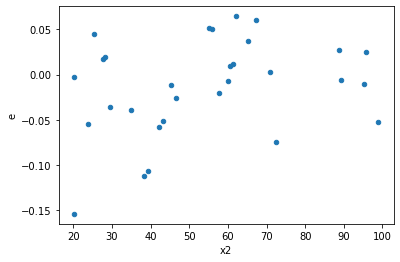

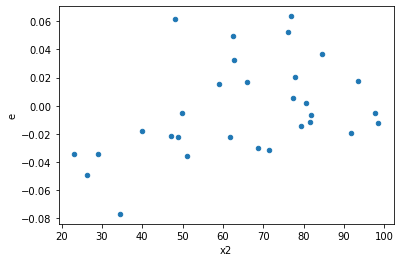

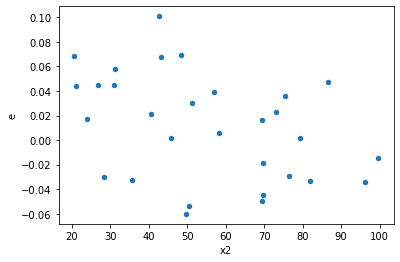

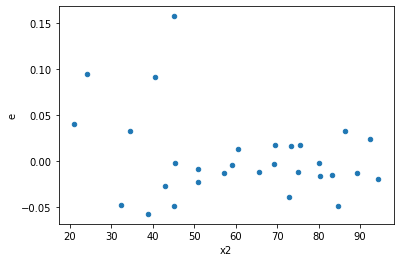

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,13.0,11.0,0.01995839811763979,0.037482396023899016,0.0015352613936645992,0.003407490547627183,2.219485594888606,0.1933492427745236,0.9033253786127382,0.0966746213872618,Reject001=1 : Homoscedasticity
7.0,8.0,16.0,0.006115132580694625,0.012518624103420806,0.0007643915725868281,0.0007824140064638004,1.0235774889772546,0.9154847770282597,0.5422576114858702,0.45774238851412985,Reject001=1 : Homoscedasticity
8.0,12.0,12.0,0.01575594366154068,0.02145461239966783,0.0013129953051283902,0.0017878843666389859,1.3616837468159562,0.6011844924075453,0.6994077537962273,0.3005922462037727,Reject001=1 : Homoscedasticity
12.0,13.0,11.0,0.005481802159502067,0.015164079940691204,0.0004216770891924667,0.0013785527218810186,3.2692141859568844,0.05688016686734443,0.9715599165663278,0.028440083433672214,Reject001=1 : Homoscedasticity
14.0,9.0,15.0,0.0032829800473441447,0.021516100173322287,0.0003647755608160161,0.0014344066782214857,3.9322992883971346,0.01917459332034044,0.9904127033398298,0.00958729666017022,Reject001=1 : Homoscedasticity
17.0,14.0,10.0,0.01385850072630878,0.02053744240704507,0.0009898929090220558,0.0020537442407045072,2.0747135594025634,0.2493501469606647,0.8753249265196676,0.12467507348033235,Reject001=1 : Homoscedasticity
18.0,9.0,15.0,0.007860426757968306,0.022821165093686768,0.0008733807508853673,0.0015214110062457846,1.741979090681233,0.32858667337958636,0.8357066633102068,0.16429333668979318,Reject001=1 : Homoscedasticity
19.0,11.0,13.0,0.02286168591726716,0.04146829631948108,0.002078335083387924,0.003189868947652391,1.5348193720776437,0.45807415834924403,0.770962920825378,0.22903707917462202,Reject001=1 : Homoscedasticity
20.0,14.0,10.0,0.01644753874763829,0.01478039303445109,0.0011748241962598778,0.001478039303445109,1.2580940264513911,0.7276560605761939,0.636171969711903,0.36382803028809696,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,15.0,0.011592093045618935,0.010095978017590546,0.0012880103384021039,0.000673065201172703,0.5225619555256852,0.3271888633126103,Reject001=1 : Homoscedasticity
1.0,13.0,11.0,0.01995839811763979,0.037482396023899016,0.0015352613936645992,0.003407490547627183,2.219485594888606,0.1933492427745236,Reject001=1 : Homoscedasticity
2.0,8.0,16.0,0.014587476787044909,0.013113893372711434,0.0018234345983806136,0.0008196183357944646,0.44949149068596433,0.25312707269635276,Reject001=1 : Homoscedasticity
3.0,13.0,11.0,0.016509941296858382,0.013566538442069955,0.0012699954843737216,0.001233321676551814,0.9711228832912011,0.947517447235844,Reject001=1 : Homoscedasticity
4.0,13.0,11.0,0.041727496780318986,0.01069697988870617,0.003209807444639922,0.0009724527171551064,0.3029629452629663,0.044312778334731275,Reject001=1 : Homoscedasticity
5.0,15.0,9.0,0.023002989498486802,0.005347217709459142,0.0015335326332324534,0.0005941353010510158,0.3874291868172828,0.10087726722129092,Reject001=1 : Homoscedasticity
6.0,9.0,15.0,0.0233668777329445,0.017015535357600576,0.0025963197481049445,0.0011343690238400383,0.4369142223980752,0.21166281608760787,Reject001=1 : Homoscedasticity
7.0,8.0,16.0,0.006115132580694625,0.012518624103420806,0.0007643915725868281,0.0007824140064638004,1.0235774889772546,0.9154847770282597,Reject001=1 : Homoscedasticity
8.0,12.0,12.0,0.01575594366154068,0.02145461239966783,0.0013129953051283902,0.0017878843666389859,1.3616837468159562,0.6011844924075453,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      851
Reject001=0 : Heteroscedasticity    149
Name: Result_test, dtype: int64